## Where to Find the Fantastic E-sports Companies: from News to Reality

## 1. Introduction

### 1.1 Background
On August 2, 2011, 3 am, Wang Sicong posted a microblog, “Strong entry, integration of e-sports (强势进入, 整合电竞) ”, with a picture of the logo of the IG Club which was experiencing a reorganization that time. With 500,000,000 Yuan, Wang wanted to play a challenging game.
However, the post generated only little discussion. The spectators have no higher expectations for this young man who was born with a silver spoon: ordinary e-sports enthusiasts questioned his poaching behavior, and his pessimistic prediction of the decline of the e-sports industry. 5 hundred million did not provoke a splash in a broader market, when there were few media coverages of this event.
People never thought about that they would pay attention to this post after seven years, and make online comments like "IG is the champion" over and over again. Similarly, even those who were good at analysis and calculations did not expect e-sports would grow into an eye-catching market.
Nowadays, e-sports has got into the sights of more Chinese people, while what behind the glory is a barbaric growth of the e-sports industry. A variety of e-sports companies have sprung up in various cities, launching different projects.
Meanwhile, mainstream media's attitude towards e-sports is also gradually changing. But it only pays more attention to famous players and investors.
Hence, our project is motivated by such trend and we would like to examine the development of China’s e-sports companies from two dimensions: in reality and in news. We try to figure the urban distribution of China’s e-sports-related companies, what factors may relate to it, how e-sports industry is reported in Chinese news and if there is any difference between the reality and news. 

### 1.2 Other works review
Previous works about e-sports mainly focus on e-sports players, teams and leading game companies. In terms of e-sports players, most forms are feature stories and in-depth reports. GQ magazine did some profiles of famous e-sports players like Sky (Li Xiaofeng) and Uzi (Jian Zihao).
Beyond the center of e-sports, there are some reports focusing on peripheral fields related to e-sports. DT Finance did a research about e-sports consumptive places, comparing the development of e-sports hotels in Zhengzhou and Shanghai. As a result, DT Finance found that the level of development of e-sports industry is not directly related to the rise of e-sports hotels, and e-sports hotels are more matched with the consuming demands of game players in second and third-tier cities.
In terms of data mining and visualization, there's little reports about e-sports using data visualization. The paper, a new media of Shanghai, used data to explain the development of Shanghai’s e-sport industry. The sources were from industrial reports, including number of game players and revenue of big companies. 
To sum up, there's little visualized reports about e-sports field from the prospective of e-sports companies’ developing trend and urban distribution, which leaves space for our research.

### 1.3 Research Questions
Based on previous work and our own interest, we come up with our research questions:
RQ1. What is the development trend of Chinese e-sports-related companies?
RQ2. What’s the urban distribution of e-sports-related companies in China?
RQ3. What factors may relate to the development trend and urban distribution?
More specifically, what are the correlates of variation in e-sports development when comparing two cities?
Variables to be taken into consideration are as follows: politics (policy support/tax), economy (GDP, industrial structure), technology (average network speed, Internet access costs), population (population structure), industrial clusters (ACG companies), etc.
RQ4.How does Chinese news cover e-sports? Is there any difference between the reality and news?



## 2.Method
### 2.1 Data Source
Our data source includes three parts: data of e-sports-related companies, financial news related to e-sports and data of other factors.


#### 2.1.1 Data of e-sports-related companies:
Firstly, to acquire data of e-sports companies, we examined platforms like Tianyancha (https://www.tianyancha.com),Qichacha(https://www.qichacha.com) and Qixinbao (https://www.qixin.com). However, we found that the data on these platforms was not open to the public, which means that we may face legal risks when crawling commercial data that it provides, so we bought a VIP account of Tianyancha.com to download the data we need.
When we collected  the data before downloading, the searching keywords were“电竞(the abbreviation of e-sports)” and “电子竞技(e-sports)”. In order to obtain accurate and valid data, we set some filters, including registered capital (over 1,000,000 RMB), industry classification (companies belonging to “Information transmission, software and information technology services”, “Culture, sports and entertainment”, or “Business services”). After that, we got the data of e-sports-related companies that stored in excel.

#### 2.1.2 Data of e-sports financial news
Secondly, we selected Sina News as the website to scrape news. The reasons why we chose Sina News included that it was an integrated news portal which collected news from media, and that it had high-level searching filters. So, we searched for the keywords “电竞(the abbreviation of e-sports)” and “电子竞技(e-sports)” in Sina financial news reports, with the crawling fields including  headline of news, date of press release and source of news. 

#### 2.1.3 Data of other factors relating data source: 
Lastly, we wonder if there are any other factors that relate to the developments of e-sports industry in different parts of China. To figure out this question, we collected three other dimensions of data: Average Network Speed, City GDP and Population structure. We obtain text reports of the average network speed in 2013-2016 in PDF version from China Broadband Rate Development Report (http://www.199it.com/archives/746376.html) and China Broadband Popularization Report (http://www.199it.com/archives/746376.html). As for City GDP and population structure, the source of them is National Bureau of Statistics(http://data.stats.gov.cn/easyquery.htm?cn=E0105). 

### 2.2 Data Acquisition
The picture below is one of our targeted webpages, Sina News, in inspecting mode.  We found that Sina News was built in html pages, so we used Request and Beautifulsoup modules to scrape and parse the pages. In the process of data acquisition, we encountered two major difficulties: one was page looping and the other was source split. Financial news related to e-sports on Sina News were over 80 pages, so the address of website that we crawled was changing. Based on web observation, we found the rule of the changing page number of Sina News. Therefore, we controlled the page looping by generating a sequence of numbers that arranged in orders. 
Originally, we decided to scrape the news pages where fields like titles and dates were structured. However, some of the news pages were deleted so we turned to crawl fields in search results pages. There was a new problem: most of the raw data were stored in the same line of code. To solve this problem, we split date and source from one list, as well as splitting year, month and day from date. After splitting data into appropriate classification, data cleaning became much easier to execute. 


In [2]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import time

In [ ]:
#爬取关键字为“电竞”，范围为新浪新闻财经频道1到88页，约为2018年到2006年
base_url='http://search.sina.com.cn/?c=news&q=%B5%E7%BE%BA&range=title&num=10&col=1_7&source=&from=&country=&size=&time=&a=&page={}&pf=2131425496&ps=2132080888&dpc=1'

all_datetime = []
all_source = []
sourcelist=[]
datelist=[]
yearlist = []
monthlist = []
daylist = []
titlelist=[]
all_link= []


for page in range(0, 89):
    url = base_url.format(page)
    req = requests.get(url,headers={'Accept-Encoding': ''})
    #req.encoding = 'UTF-8'
    soup = BeautifulSoup(req.text, 'html.parser')
    div_name = soup.find_all('h2')
    title=[i.find('a') for i in div_name]
   #links = soup.find_all('div',class_='r-info r-info2')
    #for item in links:
    #    link = item.find('a').attrs['href']
     #   all_link.append(link)
    for a in title:
        titlelist.append(a.get_text())
        
    div_date_source = soup.find_all('span', class_='fgray_time')
    date_source = [a.get_text() for a in div_date_source]
  
    for i in date_source:
        sourcelist.append(i.split(" ",2)[0])
        datelist.append(i.split(' ',2)[1])
        #print(datelist)
        t=i.split(' ',2)[1]
        yearlist.append(t.split("-",2)[0])
        monthlist.append(t.split("-",2)[1])
        daylist.append(t.split("-",2)[2])
     


df = pd.DataFrame({'title':titlelist,
                    'source':sourcelist,
                   'year':yearlist,
                 'month':monthlist,
                  'day':daylist})

df

df.to_csv("sinanews_dianjing1.csv")

In [4]:
df_dianjing1 = pd.read_csv('sinanews_dianjing1.csv')
df_dianjing1.head()

,Unnamed: 0,title,source,year,month,day
0,0,QG电竞俱乐部完成近亿元A轮融资,新浪财经,2018,9,27
1,1,亚运会夺冠会给电竞教育带来多少利好,新浪财经-自媒体综合,2018,9,13
2,2,【Research and Markets：电竞市场在2,新浪财经,2018,9,11
3,3,多路资本涌入880亿电竞市场 中国电竞等待斯特恩,每日经济新闻,2018,9,11
4,4,虎牙宣布运营《守望先锋联赛》战队 布局全球电竞,环球网,2018,9,8


### 2.3 Data Processing
There are two parts of the data processing, one is data processing of Sina financial news of e-sports, and the other is data processing of e-sports related companies from Tianyancha.

#### 2.3.1 Data processing of sina.news
Firstly, the formats of data that we got from Sina News which was collected according to the keywords of “电竞”and “电子竞技” were  two CSV files. So, we merged two CSV files into one and dropped the duplicated data. Meanwhile, we aimed to look up news from the latest 10 years so we set conditions and got news from 2009 to 2018.

In [9]:
result.to_csv("hebing1.csv")
df_dianjing5 = result
df_dianjing5.head()

,Unnamed: 0,Unnamed: 0.1,day,month,source,title,year
0,0,NaN,27,9,新浪财经,QG电竞俱乐部完成近亿元A轮融资,2018
1,1,NaN,13,9,新浪财经-自媒体综合,亚运会夺冠会给电竞教育带来多少利好,2018
2,2,NaN,11,9,新浪财经,【Research and Markets：电竞市场在2,2018
3,3,NaN,11,9,每日经济新闻,多路资本涌入880亿电竞市场 中国电竞等待斯特恩,2018
4,4,NaN,8,9,环球网,虎牙宣布运营《守望先锋联赛》战队 布局全球电竞,2018


In [10]:
df_dianjing6 = pd
df_dianjing6 = df_dianjing5.drop_duplicates('title')

In [12]:
df_dianjing6.sort_values(by = "year",ascending = False)

,Unnamed: 0,Unnamed: 0.1,day,month,source,title,year
0,0,NaN,27,9,新浪财经,QG电竞俱乐部完成近亿元A轮融资,2018
53,53,53.0,18,6,扬子晚报网,CEC2018苏州激情开幕！中国电子竞技嘉年华总部基地落户苏州,2018
77,77,77.0,19,3,中国新闻网,第二届世界电子竞技运动会全球总决赛闭幕 中国女子CS：GO获亚军,2018
76,76,76.0,20,3,新华社,电子竞技奥运路还有多长 最大限度规避游戏副作用,2018
75,75,75.0,28,3,中国青年报,霍启刚：电子竞技可登亚运奥运大雅之堂,2018
74,74,74.0,2,4,中国体育报,电子竞技将亮相京交会,2018
73,73,73.0,12,4,人民日报海外版海外网,我能用国足参加国际足联的电子竞技世界杯吗？,2018
72,72,72.0,29,4,新浪财经,2018中国一东盟电子竞技大赛在南宁启动,2018
71,71,71.0,29,4,中国新闻网,中国一东盟电子竞技大赛9月举行 赛事覆盖东盟十国,2018
70,70,70.0,7,5,新浪体育,2018年UCL中国大学生电子竞技联赛圆满落幕,2018


In [13]:
df_dianjing6.to_csv("hebing.csv")

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
df6 =pd.read_csv('hebing.csv')

In [16]:
df5 = pd
df5 = df6.loc[df6['year']> 2008]
df5

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,day,month,source,title,year
0,0,0,NaN,27,9,新浪财经,QG电竞俱乐部完成近亿元A轮融资,2018
1,1,1,NaN,13,9,新浪财经-自媒体综合,亚运会夺冠会给电竞教育带来多少利好,2018
2,2,2,NaN,11,9,新浪财经,【Research and Markets：电竞市场在2,2018
3,3,3,NaN,11,9,每日经济新闻,多路资本涌入880亿电竞市场 中国电竞等待斯特恩,2018
4,4,4,NaN,8,9,环球网,虎牙宣布运营《守望先锋联赛》战队 布局全球电竞,2018
5,5,5,NaN,7,9,娱乐资本论,电竞馆的贴地飞行：从两月回本 到办卡跑路,2018
6,6,6,NaN,4,9,新浪财经-自媒体综合,奥委会主席表态 电竞产业布局生变,2018
7,7,7,NaN,3,9,北京商报,奥委会主席表态 电竞产业将迎调整风口,2018
8,8,8,NaN,3,9,乐居财经,9家房企争夺！中国电建9.8亿竞得大杨石65.51亩居住用地,2018
9,9,9,NaN,3,9,新京报,巴赫：电竞不移除暴力元素就不允许入奥,2018


In [17]:
dict_year = {}
for key in df5['year']:
    dict_year[key] = dict_year.get(key, 0) + 1
print(dict_year)

{2018: 210, 2017: 367, 2016: 258, 2015: 157, 2014: 157, 2013: 89, 2012: 54, 2010: 88, 2009: 50, 2011: 42}


In [18]:
def sortedDictValues1(dict_year): 
    items = adict.items() 
    items.sort() 
    return [value for key, value in items] 
print(dict_year)

{2018: 210, 2017: 367, 2016: 258, 2015: 157, 2014: 157, 2013: 89, 2012: 54, 2010: 88, 2009: 50, 2011: 42}


In [19]:
new_list = []
new_list = sorted(dict_year.items(), key = lambda d:d[0])

In [20]:
new_dict = {}
for i in new_list:
    new_dict[i[0]] = i[1]                
new_dict

{2009: 50,
 2010: 88,
 2011: 42,
 2012: 54,
 2013: 89,
 2014: 157,
 2015: 157,
 2016: 258,
 2017: 367,
 2018: 210}

In [21]:
x1 = []
for i in new_dict.keys():
        x1.append(i)

print(x1)

y1 = []
for i in new_dict.values():
    y1.append(i)
print(y1)

[2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018]
[50, 88, 42, 54, 89, 157, 157, 258, 367, 210]


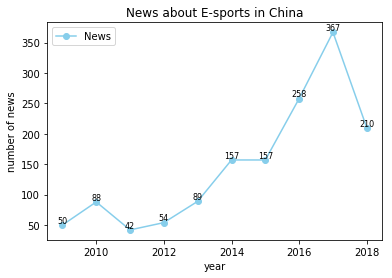

In [22]:
#X轴，Y轴数据
x_1 = x1
y_1 = y1
#plt.figure(figsize=(16,8)) #创建绘图对象
plt.plot(x_1,y_1,'o-',label='News',color = 'skyblue')   #在当前绘图对象绘图（X轴，Y轴）
plt.xlabel("year") #X轴标签
plt.ylabel("number of news")  #Y轴标签
plt.title("News about E-sports in China") #图标题

for a, b in zip(x_1, y_1):
    plt.text(a, b, b, ha='center', va='bottom', fontsize=8)

plt.legend()
plt.show()  #显示图

#### 2.3.2 Data processing of tianyancha
Next, we cleaned the data from Tianyancha. On one hand,  the column of “注册资本(registered capital)”was string instead of numeric so it was unable to make a ranking.We transformed   the string type into numeric and created a new column called ’moneylist’, whose value can be sorted.
On the other hand, we only need data of years when the e-sports companies were established, while  the column of “成立日期(date of establishment)” contained too much information. So, we extracted the years and put them into a new list “years”.
After adjusting the column, the new data frame is as shownin this table below.
![cleandataoftianyancha](https://github.com/zhuang27149/e-sport-company/blob/master/images/tianyancha-clean.png)

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pygal

In [25]:
!pip install pygal

You are using pip version 18.0, however version 18.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [2]:
df=pd.read_excel('121.xlsx',encoding='utf-8')
df.shape

(1616, 16)

In [79]:
df.columns

Index(['公司名称', '法定代表人', '注册资本', '成立日期', '经营状态', '所属省份', '所属市区', '所属区县', '公司类型',
       '统一社会信用代码', '企业公示的联系电话', '企业公示的联系电话（更多号码）', '企业公示的地址', '企业公示的网址',
       '企业公示的邮箱', '经营范围'],
      dtype='object')

In [80]:
df.head()

,公司名称,法定代表人,注册资本,成立日期,经营状态,所属省份,所属市区,所属区县,公司类型,统一社会信用代码,企业公示的联系电话,企业公示的联系电话（更多号码）,企业公示的地址,企业公示的网址,企业公示的邮箱,经营范围
0,浙报数字文化集团股份有限公司,张雪南,130192 万人民币,1992-07-01,存续,浙江,NaN,NaN,股份有限公司,91330000132211766N,85311940,85312014;,浙江省体育场路178号26-27楼,www.600633.cn ; www.600633.cn ; www.zjdex.com ...,zdm@8531.cn ;,文化产业投资、投资管理（未经金融等监管部门批准，不得从事向公众融资存款、融资担保、代客理财等...
1,上海捷竞电子商务有限公司,温祖骏,660 万人民币,1998-01-15,存续,上海,上海市,闵行区,有限责任公司,91310112132297424X,13919269350,13918269350;021-62696200;,上海市青浦区胜利路588号5幢1层S区135室,www.shjjec.com ;,2880720318@qq.com ; wengzj@sjlexpress.com ; li...,电子商务（不得从事增值电信、金融业务），网络科技领域内的技术服务、技术开发、技术咨询、技术转...
2,杭州竞天传媒有限公司,杨政伟,188 万人民币,2000-03-13,存续,浙江,杭州市,萧山区,有限责任公司,913301097210169984,83737585,82864888;,萧山区瓜沥镇光明大酒店,NaN,NaN,设计、制作、代理、发布国内各类广告，企业管理咨询，庆典、会展服务，网络维护，网页设计，防盗监...
3,厦门大雅传奇文化传播有限公司,彭兰英,2040 万人民币,2002-10-24,存续,福建,厦门市,NaN,有限责任公司,91350200737869245T,13806080922,6300162;6300108;,厦门市软件园望海路12号502D、502F,deya.cn ; http://mail.deya.cn/ ; http://www.de...,hrxz@deya ; 13806080922@139.com ;,市场管理；电影和影视节目发行；电影和影视节目制作；国内劳务派遣服务；电视；人才中介服务；信息...
4,广州思因品牌策划有限公司,帅飞鸽,100 万人民币,2004-09-29,注销,广东,广州市,海珠区,有限责任公司,91440105767658537Q,18688464659,NaN,广州市海珠区新港东路海诚东街10号503房（仅作写字楼功能用）（临时经营场所有效期至2017...,NaN,1520412985@qq.com ;,展台设计服务;包装装潢设计服务;策划创意服务;饰物装饰设计服务;城市规划设计;企业形象策划服...


In [40]:
#分组
places=df.groupby(by='所属省份').size()

In [139]:
#查看
for k in places.index:
    print(k, places[k])

海南 417
广东 273
江苏 100
安徽 68
上海 64
浙江 62
陕西 54
山东 53
重庆 44
北京 44
湖北 43
四川 41
湖南 37
江西 36
河南 35
福建 34
贵州 30
广西 21
甘肃 21
辽宁 17
吉林 14
黑龙江 14
新疆 10
河北 10
宁夏 9
天津 9
山西 9
云南 7
内蒙古 4
西藏 2


In [22]:
type(places)

pandas.core.series.Series

In [30]:
provinces=['Hainan','Guangdong','Jiangsu','Anhui','Shanghai','Zhejiang','Shanxi','Shandong','Chongqing','Beijing']
#for i in places[0:9]:
    #places.index[i]=provinces[i]

In [ ]:
#排序
places.sort_values(ascending=False,inplace=True)

<BarContainer object of 10 artists>

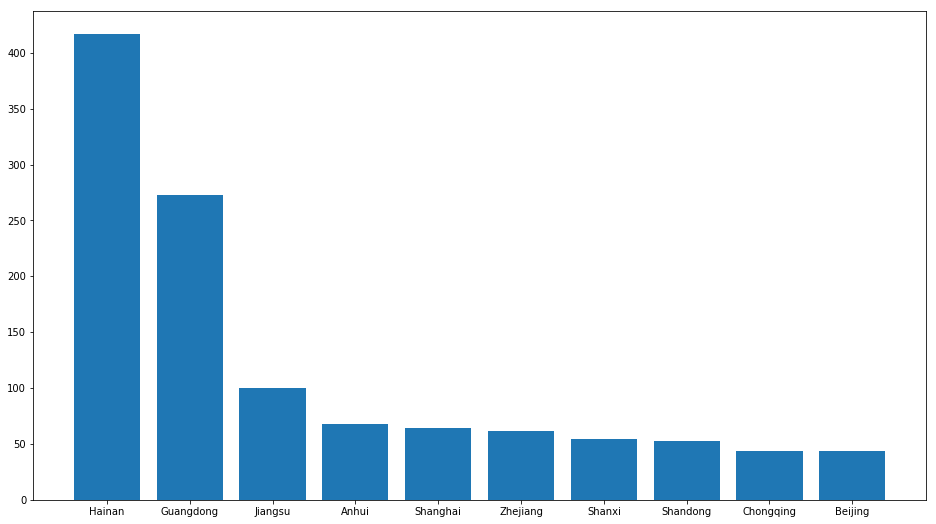

In [56]:
plt.figure(figsize=(16,9)) 
plt.bar(provinces,places[0:10].values)   


In [61]:
#海南逐年变化，要补全没有的年份
hainan=df[df['所属省份']=='海南'].groupby('years').size()
hainan_data=hainan.cumsum()

for i in range(2009,2019):
    if str(i) not in hainan_data.index:
        if str(i-1) not in hainan_data.index:
            hainan_data[str(i)]=0
        else:
                hainan_data[str(i)]=hainan_data[str(i-1)]

hainan_data.sort_index(ascending=True,inplace=True)

In [62]:
shanghai=df[df['所属省份']=='上海'].groupby('years').size()
shanghai.cumsum()

years
1998     1
2004     2
2006     3
2007     4
2010     5
2012     8
2013    13
2014    21
2015    33
2016    51
2017    56
2018    64
dtype: int64

In [63]:
#上海逐年变化，要补全没有的年份
shanghai=df[df['所属省份']=='上海'].groupby('years').size()
shanghai_data=shanghai.cumsum()

for i in range(1998,2019):
    if str(i) not in shanghai_data.index:
        if str(i-1) not in shanghai_data.index:
            shanghai_data[str(i)]=0
        else:
                shanghai_data[str(i)]=shanghai_data[str(i-1)]

shanghai_data.sort_index(ascending=True,inplace=True)
shanghai_data

years
1998     1
1999     1
2000     1
2001     1
2002     1
2003     1
2004     2
2005     2
2006     3
2007     4
2008     4
2009     4
2010     5
2011     5
2012     8
2013    13
2014    21
2015    33
2016    51
2017    56
2018    64
dtype: int64

In [38]:
gd_group=df[df['所属省份']=='广东'].groupby('所属市区').size()
gd_group

所属市区
东莞市      4
中山市      2
佛山市      5
广州市     15
惠州市      2
梅州市      1
江门市      1
深圳市    213
清远市      1
珠海市      9
阳江市      1
韶关市      1
dtype: int64

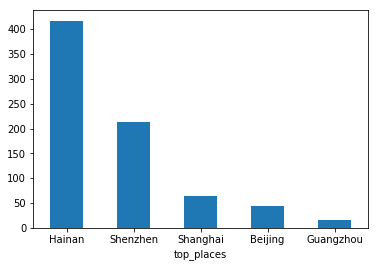

In [39]:
#北上深琼条形图
top4=pd.DataFrame({'top_places':['Hainan','Shenzhen','Shanghai','Beijing','Guangzhou'],
                   'nums':[places['海南'],gd_group['深圳市'],places['上海'],places['北京'],gd_group['广州市']]})
top4.plot(x='top_places',kind='bar',legend=False,rot=0)  

plt.show()

In [8]:
#十年变化折线图（全国+地方）
df['years']=[str(i).split('-')[0] for i in df['成立日期']]

In [34]:
num_year=df.groupby('years').size()
num_year.head

<bound method NDFrame.head of years
1992      1
1995      1
1998      2
1999      1
2000      1
2001      1
2002      1
2003      2
2004      7
2005      4
2006      6
2007      3
2008      3
2009      5
2010      9
2011      7
2012     14
2013     16
2014     42
2015    119
2016    242
2017    341
2018    788
dtype: int64>

In [35]:
nation_data=num_year.cumsum()
allyears=list(nation_data['2009':'2018'].index)
allyears

['2009',
 '2010',
 '2011',
 '2012',
 '2013',
 '2014',
 '2015',
 '2016',
 '2017',
 '2018']

In [ ]:
def line_fg(x,y,c):
    plt.plot(x,y,'-',linewidth=2, color = c,marker = 'o',markersize = 6,markerfacecolor='brown' )    
    for a, b in zip(x, y):
        plt.text(a, b, b, ha='center', va='bottom', fontsize=12)

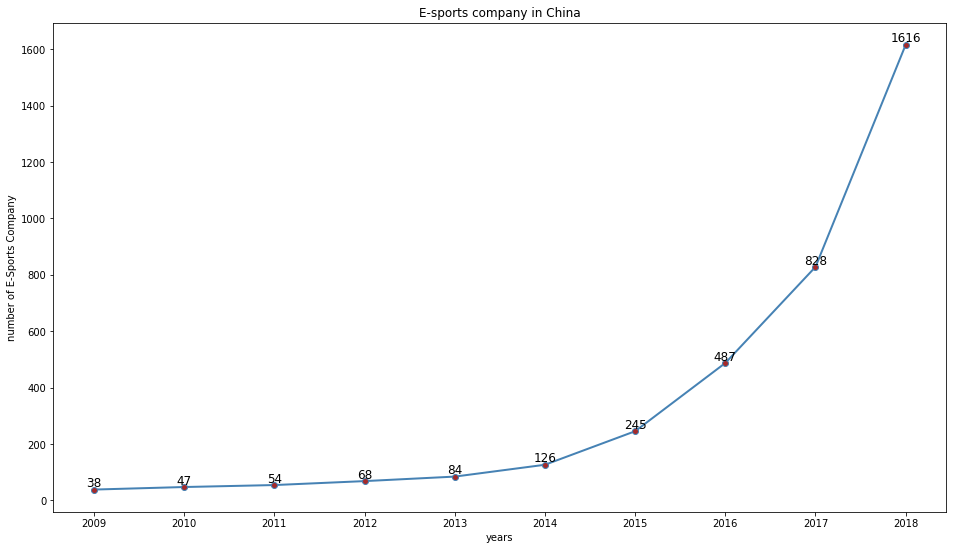

In [103]:
#全国逐年变化图


plt.figure(figsize=(16,9)) 
line_fg(allyears,nation_data['2009':'2018'].values,'steelblue')


plt.xlabel("years") #X轴标签
plt.ylabel("number of E-Sports Company")  #Y轴标签
plt.title("E-sports company in China") #图标题
plt.show()  #显示图





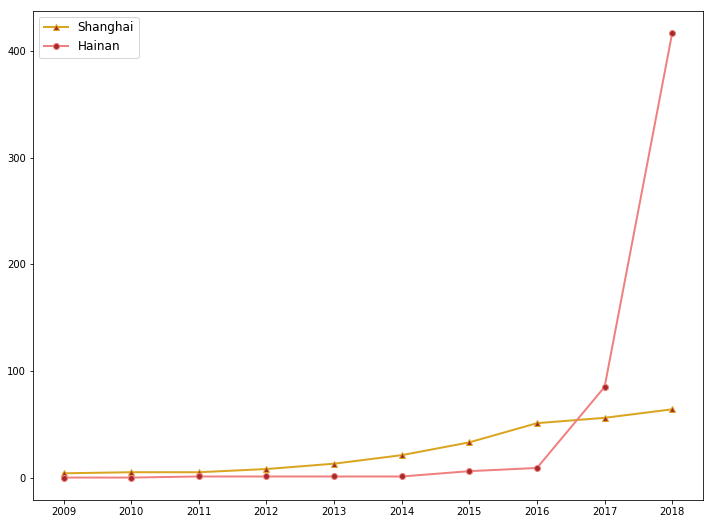

In [64]:
#上海海南变化折线图
plt.figure(figsize=(12,9)) 
f1,=plt.plot(shanghai_data['2009':'2018'].index,shanghai_data['2009':'2018'].values,'-',color='goldenrod',linewidth=2,marker = '^',markersize = 6,markerfacecolor='brown')   
f2,=plt.plot(hainan_data.index,hainan_data.values,'-',color='lightcoral',linewidth=2,marker = 'o',markersize = 6,markerfacecolor='brown')
plt.legend(handles = [f1, f2,], labels = ['Shanghai', 'Hainan'], loc = 'best',fontsize=12)

In [ ]:
#海南资本
moneylist=[]
for i in df["注册资本"]:
    try:
        m=pd.to_numeric(i.split('万',1)[0])
        m=m*10000
    except:
        m=np.nan
    moneylist.append(m)
moneylist
df['moneylist']=moneylist
hainan_mon=df[df['所属省份']=='海南']['moneylist']
hainan_year=df[df['所属省份']=='海南']['years']

In [80]:
hainan_y=hainan_year.sort_values(ascending=True)
hainan_y
#hainan_m=hainan_mon.sort_values(ascending=True)
#hainan_m

219     2011
533     2015
796     2015
76      2015
633     2015
608     2015
226     2016
843     2016
60      2016
135     2017
134     2017
131     2017
125     2017
130     2017
129     2017
128     2017
126     2017
124     2017
577     2017
569     2017
570     2017
140     2017
581     2017
584     2017
585     2017
587     2017
106     2017
568     2017
141     2017
1599    2017
        ... 
275     2018
274     2018
272     2018
271     2018
270     2018
294     2018
394     2018
295     2018
297     2018
323     2018
320     2018
319     2018
318     2018
317     2018
316     2018
313     2018
311     2018
310     2018
309     2018
308     2018
307     2018
306     2018
304     2018
303     2018
302     2018
301     2018
299     2018
298     2018
296     2018
353     2018
Name: years, Length: 417, dtype: object

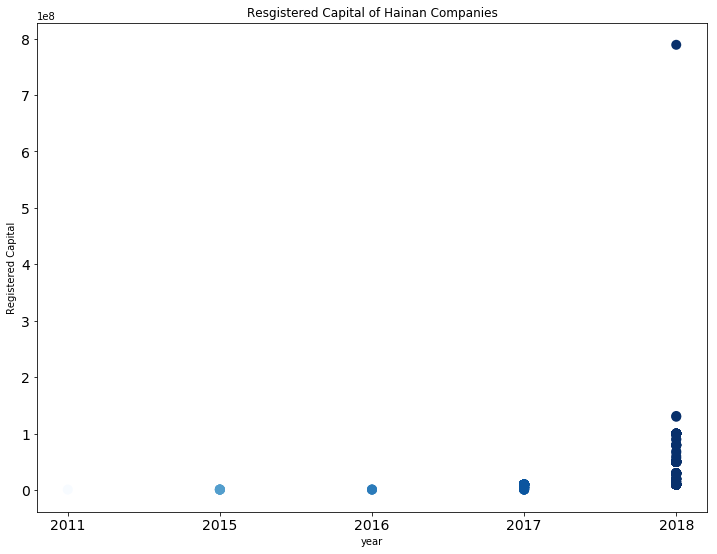

In [58]:
plt.figure(figsize=(12,9)) 
plt.scatter(hainan_y,hainan_m,c=hainan_y,cmap=plt.cm.Blues,edgecolor='none',s=100)
plt.title('Resgistered Capital of Hainan Companies')
plt.xlabel('year')
plt.ylabel('Registered Capital')
plt.tick_params(axis='both',which='both',labelsize=14)
plt.show
#plt.savefig('hainan_capital.png',bbox_inches='tight')

In [43]:
#pygal module
num_5=[places['海南'],gd_group['深圳市'],places['上海'],places['北京'],gd_group['广州市']]
num_5

[417, 213, 64, 44, 15]

In [53]:
num_5=[places['海南'],gd_group['深圳市'],places['上海'],places['北京'],gd_group['广州市']]
hist=pygal.Bar()
hist.title='E-sports related companies in five cities'
hist.x_labels=['Hainan','Shenzhen','Shanghai','Beijing','Guangzhou']
hist.x_title='Regions'
hist.y_title='Numbers of E-sport-related Companies'
hist.add('Numbers',num_5)
#pygal.Radar(print_values=True)
hist.render_to_file('five regions.svg')
#hist.render()

In [57]:
hist=pygal.Bar()
hist.title='Top10 Provinces of E-sports related companies'
hist.x_labels=provinces
hist.x_title='Provinces'
hist.y_title='Numbers of E-sport-related Companies'
hist.add('Numbers',places[0:10].values)
hist.render_to_file('Provinces.svg')


In [69]:
line_chart=pygal.Line()
line_chart.title='Hainan VS Shanghai'
line_chart.x_labels=allyears
line_chart.add('Hainan',hainan_data.values)
line_chart.add('Shanghai',shanghai_data['2009':'2018'].values)
line_chart.render_to_file('Hainan&Shanghai.svg')

In [70]:
line_national=pygal.Line()
line_national.title='National Change in 10 years'
line_national.x_labels=allyears
line_national.add('National',nation_data['2009':'2018'].values)

line_national.render_to_file('National.svg')


## 3.Results
### 3.1 The development trend of China’s e-sports-related companies
After processing data from Tianyancha, as the chart below shows, the number of China’s e-sports-related companies have radically increased since 2014, especially in the last 3 years.

 


![developmenttrend](https://github.com/zhuang27149/e-sport-company/blob/master/images/National.svg)

 
### 3.2 The city distribution of China’s e-sports-related companies
In terms of the distribution of e-sports companies among provinces in China, Top ten provinces which have most e-sports companies are on the chart. We can see that Hainan Province has got most e-sports companies, followed by Guangdong Province.

![citydistribution](https://github.com/zhuang27149/e-sport-company/blob/master/images/Provinces.svg)

To be more specific, in Guangdong Province, the total number of e-sports-related companies is 273, among which Shenzhen takes up 213 while there are only 15 e-sports companies in Guangzhou.
 
![citydistribution-5places](https://github.com/zhuang27149/e-sport-company/blob/master/images/2.distribution-5places.png)
 
And this chart shows how many e-sports-related companies were established every year. The red line represents China and the blue one is Hainan which increases very rapidly.
In addition, we can see the registered capital of Hainan’s e-sports companies from the scatter chart. Most clustered in 100,000,000.

![capital](https://github.com/zhuang27149/e-sport-company/blob/master/images/2.capital.png)

Obviously, Hainan Province is playing an active role in e-sports industry which is quite different from our former impression. 
 
 
### 3.3 How news report e-sports in China
According to the chart, the amount of news reached peak which is 377 pieces in 2017. Also, since 2016, the amount has increased quickly. It shows the shifting of media attention. On the whole, the media still focus on famous inventors and big enterprises (such as Tencent and Blizzard), and the industrial center is Shanghai.
It is consistent with the development of e-sports companies in China to a certain extent, but there are also some abnormal situations. For example, Hainan.

![newsreport](https://github.com/zhuang27149/e-sport-company/blob/master/images/3.newsreport.png)
 

### 3.4 Factors relate to e-sports companies
Based on the above result, we find that as the flourish of the e-sports industry in China, the development gap of e-sports companies among different regions has been enlarged. We could not help wondering what factors lead to the varied degree of development of e-sports companies in different regions. In order to figure out  what differences and what factors are behind the phenomenon, we decided to select Hainan province and Shanghai as two representative regions for comparative analysis. On one hand, we chose Hainan province due to the above data results. Hainan Province unexpectedly has the largest number of e-sports companies, although in the public impression it is famous for tourism. On the other hand, we chose Shanghai, a first-tier city with a well-developed e-sports industry in public eyes. According to CNG’s report, more than 40% of e-sports competitions are held in Shanghai, as well as more than half of the top 20 well-known e-sports clubs in China have their head office in Shanghai, such as WE, iG, EDG and RNG. 
The chart shows the development trend of e-sports companies in this two places and Hainan surpassed Shanghai after 2017.

![shanghaivshainan](https://github.com/zhuang27149/e-sport-company/blob/master/images/Hainan%26Shanghai.svg)

However, when considering related factors, Shanghai surpasses Hainan in all aspects.
 
![factorsofshanghaivshainan](https://github.com/zhuang27149/e-sport-company/blob/master/images/4.factors.png)

Besides, we notice a government document《关于支持海南全面深化改革开放的指导意见(Guidance on supporting Hainan in comprehensively deepening reform and opening up)》 of General Office of the State Council, PRC, which was published in April of 20018, directly guides the development of Hainan province. It is said that “We will vigorously develop new cultural consumption, such as animation and games, Internet culture and digital content, and upgrade consumption of traditional culture” and “We will explore the development of competitive sports lottery and large international competitions that open lottery, explore ways to support the development of tourism projects in terms of space planning, land supply and resource utilization".
Sports lottery is supported by the government. Considering Hainan’s poor infrastructure, they pay more attention to Internet industry. And e-sports is the only field probably having competitive elements. That may be the reason why there are so many companies located in Hainan.



## 4. Conclusion
With the rapid development of China’s e-sports industry, different regions show different development trends and patterns, among which Hainan Province has got most e-sports companies. It seems that it’s experiencing a soundless transformation of economy. What’s behind this region and how it can be “e-sports center” with largest number of e-sports companies are worth further study. Through the further study, it may help us know better about China’s e-sports industry and economic transformation.


## Reference
[1]何书瑶. (2018). 魔都不相信电竞酒店. Retrieved from                
https://mp.weixin.qq.com/s?__biz=MzA5Mzk5MDM5MA==&mid=2650826650&idx=1&sn=ce79100ee862e9fffd6d60fd5673c473&chksm=8ba1bb03bcd63215b78583e323de8aa3931699dc0fec9405b36e06109a1cb0b3bc71f5ccb06a&scene=0&xtrack=1#rd
[2]一图到底｜上海说要打造电竞之都，现在怎么样了？_美数课_澎湃新闻-The Paper. (2018). Retrieved from https://www.thepaper.cn/newsDetail_forward_2371575
[3]国家数据. (2018). Retrieved from http://data.stats.gov.cn/search.htm?s=%E4%B8%8A%E6%B5%B7
[4]宽带发展联盟. (2018). 2018年Q1中国宽带速率状况报告(2018).[Ebook] (pp. 7-9). 
Retrieved from http://www.199it.com/archives/746376.html
[5]伽马数据. (2018). 2018电子竞技产业报告(赛事篇). Retrieved from http://youxiputao.com/articles/15341
